In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('survey_results_public.csv')

In [3]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [4]:
df.shape

(73268, 79)

In [5]:
df = df[["Country","EdLevel","YearsCodePro","Employment","ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly":"Salary"},axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [6]:
df.shape

(73268, 5)

In [7]:
mean_salary_by_country = df.groupby('Country')['Salary'].mean()

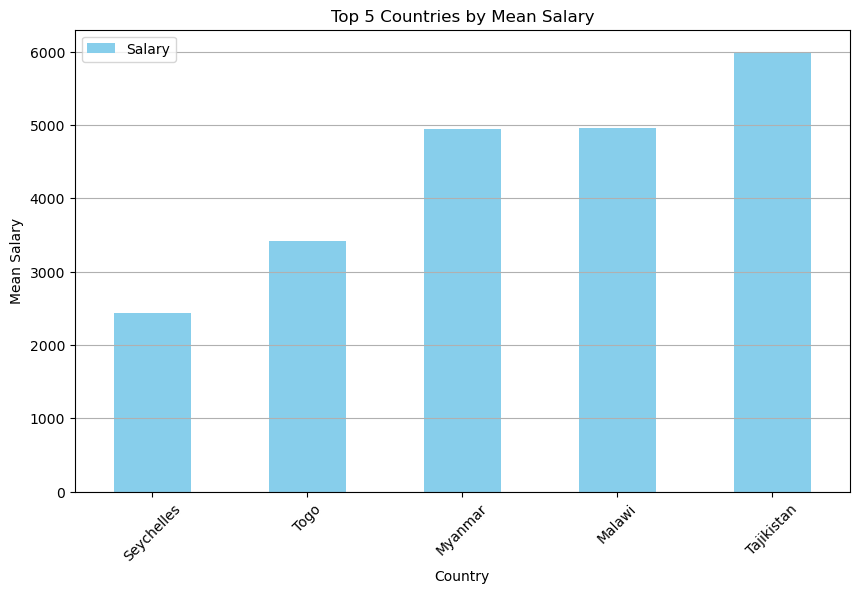

In [8]:
mean_salary_by_country = mean_salary_by_country.reset_index()

# Sort the DataFrame by mean salary in descending order and select the top 5 countries
top_5_countries = mean_salary_by_country.sort_values('Salary', ascending=True).head(5)

# Plotting the bar grap
top_5_countries.plot(x='Country', y='Salary', kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 5 Countries by Mean Salary')
plt.xlabel('Country')
plt.ylabel('Mean Salary')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [9]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [11]:
df[df['YearsCodePro'] == 'More than 50 years']

,Country,EdLevel,YearsCodePro,Employment,Salary
11759,United States of America,Some college/university study without earning ...,More than 50 years,"Independent contractor, freelancer, or self-em...",250000.0
19912,Belgium,Primary/elementary school,More than 50 years,I prefer not to say,1.0
30130,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",More than 50 years,"Employed, full-time",100000.0
30348,United States of America,Some college/university study without earning ...,More than 50 years,Retired,145000.0
31547,New Zealand,Some college/university study without earning ...,More than 50 years,Retired,64333.0
38810,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",More than 50 years,"Independent contractor, freelancer, or self-em...",125000.0
39353,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",More than 50 years,"Employed, full-time",200000.0
47396,Australia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",More than 50 years,"Employed, full-time",60155.0
59069,Poland,"Other doctoral degree (Ph.D., Ed.D., etc.)",More than 50 years,"Employed, part-time",11100.0
61973,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",More than 50 years,"Independent contractor, freelancer, or self-em...",90000.0


In [12]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [13]:
df['YearsCodePro'].unique()

array(['5', '17', '6', '2', '10', '4', '22', '20', '9', '14', '21', '15',
       '3', '25', '7', '8', '12', '19', '1', '28', '24', '11', '23', '45',
       'Less than 1 year', '18', '40', '37', '46', '13', '32', '31', '39',
       '27', '16', '26', '30', '34', '35', '29', '42', '38', '36', '43',
       '41', '44', '48', '33', 'More than 50 years', '50', '47', '49'],
      dtype=object)

In [14]:
# Filter the DataFrame to include only rows with "Employed, full-time" in the "Employment" column
df = df[df["Employment"].str.contains("Employed, full-time", na=False)]

# Drop the "Employment" column
df = df.drop("Employment", axis=1)

# Print DataFrame information
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34288 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34288 non-null  object 
 1   EdLevel       34288 non-null  object 
 2   YearsCodePro  34288 non-null  object 
 3   Salary        34288 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.3+ MB


In [15]:
df['Country'].value_counts()

United States of America                                8292
Germany                                                 2540
United Kingdom of Great Britain and Northern Ireland    2435
India                                                   2049
Canada                                                  1363
                                                        ... 
Guinea                                                     1
Palau                                                      1
Monaco                                                     1
Saint Lucia                                                1
Seychelles                                                 1
Name: Country, Length: 157, dtype: int64

In [16]:
def shorten_categories(cateories,cutoff):
    categorical_map = {}
    for i in range(len(cateories)):
        if cateories.values[i] >=cutoff:
            categorical_map[cateories.index[i]] = cateories.index[i]
        else:
            categorical_map[cateories.index[i]] = 'Other'
    return categorical_map           


In [17]:
country_map = shorten_categories(df.Country.value_counts(),400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()


Other                                                   9454
United States of America                                8292
Germany                                                 2540
United Kingdom of Great Britain and Northern Ireland    2435
India                                                   2049
Canada                                                  1363
France                                                  1202
Brazil                                                  1161
Spain                                                    921
Netherlands                                              749
Poland                                                   748
Australia                                                740
Italy                                                    710
Sweden                                                   597
Russian Federation                                       486
Switzerland                                              438
Turkey                  

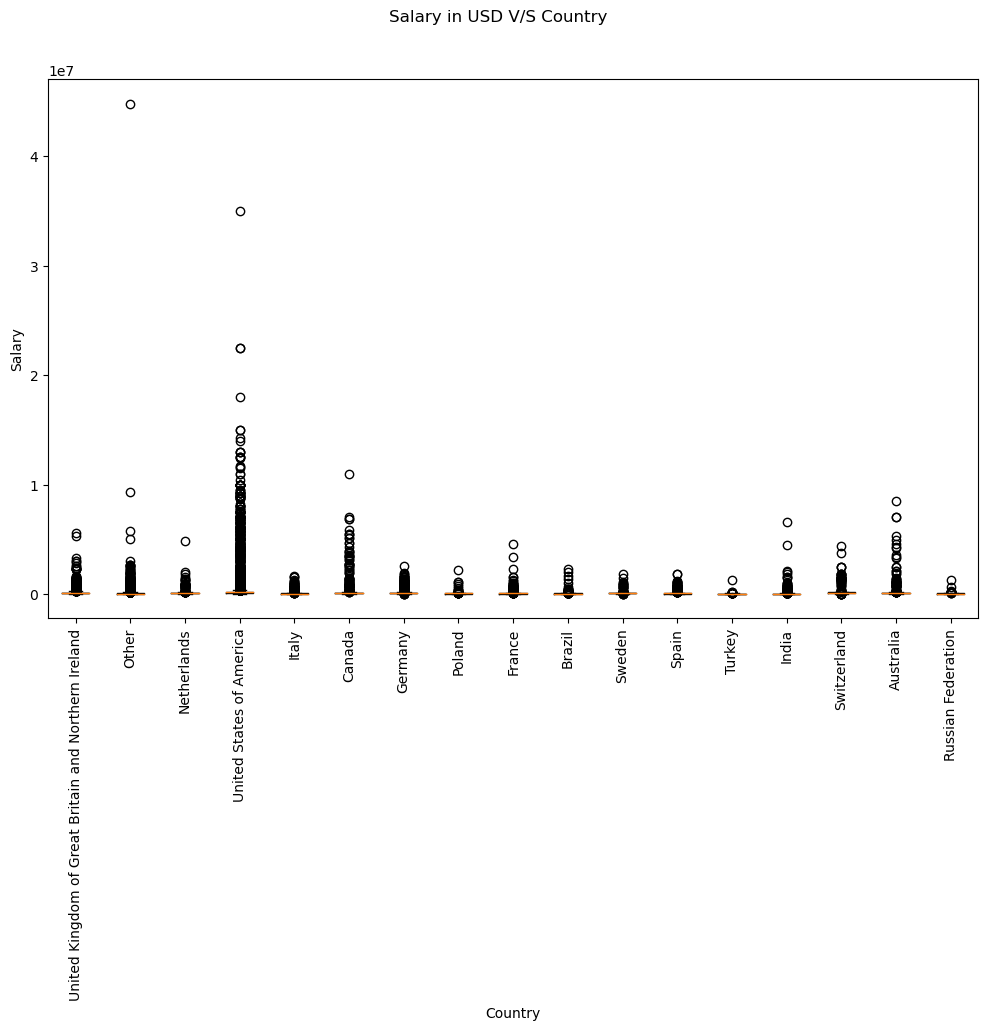

In [18]:
fig,ax= plt.subplots(1, 1, figsize=(12, 7))
ax.boxplot([df.loc[df['Country'] == country, 'Salary'] for country in df['Country'].unique()])
ax.set_xticklabels(df['Country'].unique(), rotation=90)
plt.suptitle('Salary in USD V/S Country')
plt.ylabel('Salary')
plt.xlabel('Country')
plt.show()

In [19]:
df = df[df['Salary'] <=25000]
df = df[df['Salary'] >=1000]
df = df[df['Country'] != 'other']

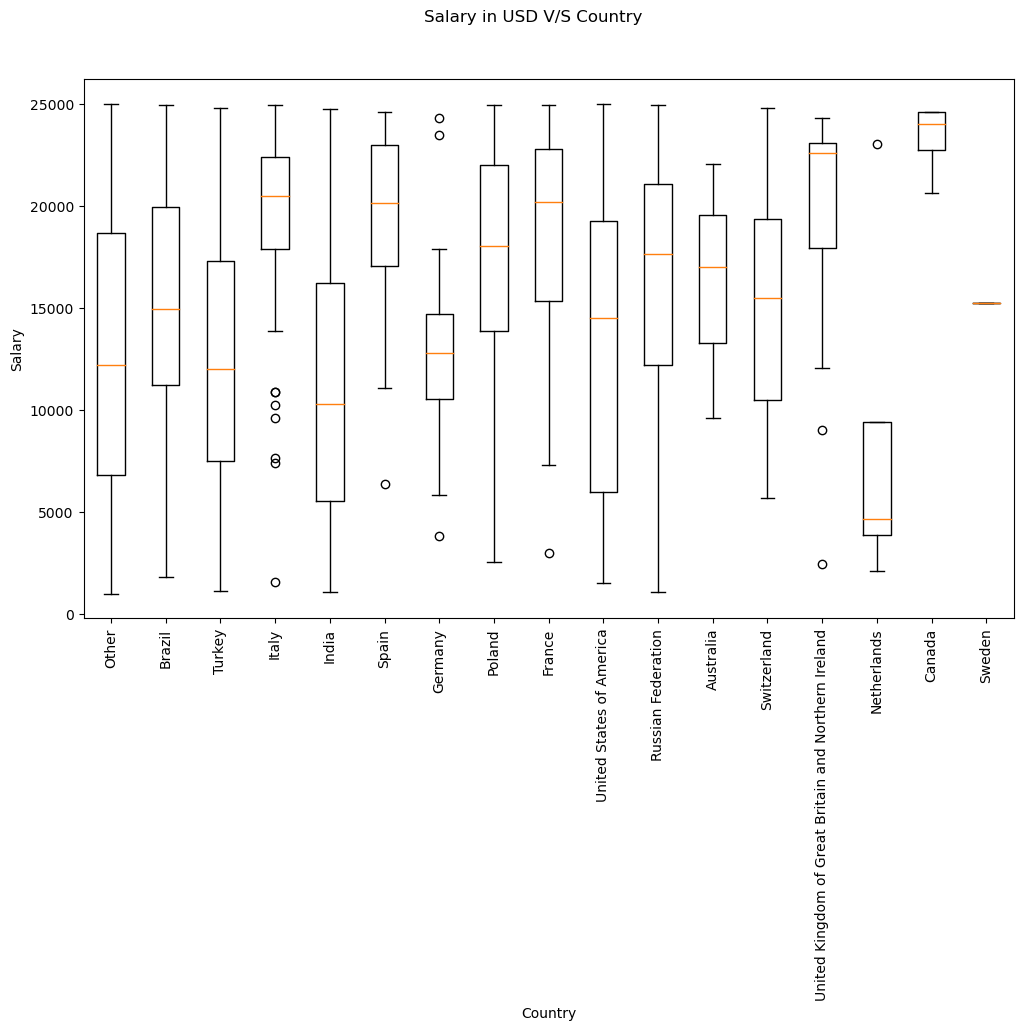

In [20]:
fig,ax= plt.subplots(1, 1, figsize=(12, 7))
ax.boxplot([df.loc[df['Country'] == country, 'Salary'] for country in df['Country'].unique()])
ax.set_xticklabels(df['Country'].unique(), rotation=90)
plt.suptitle('Salary in USD V/S Country')
plt.ylabel('Salary')
plt.xlabel('Country')
plt.show()

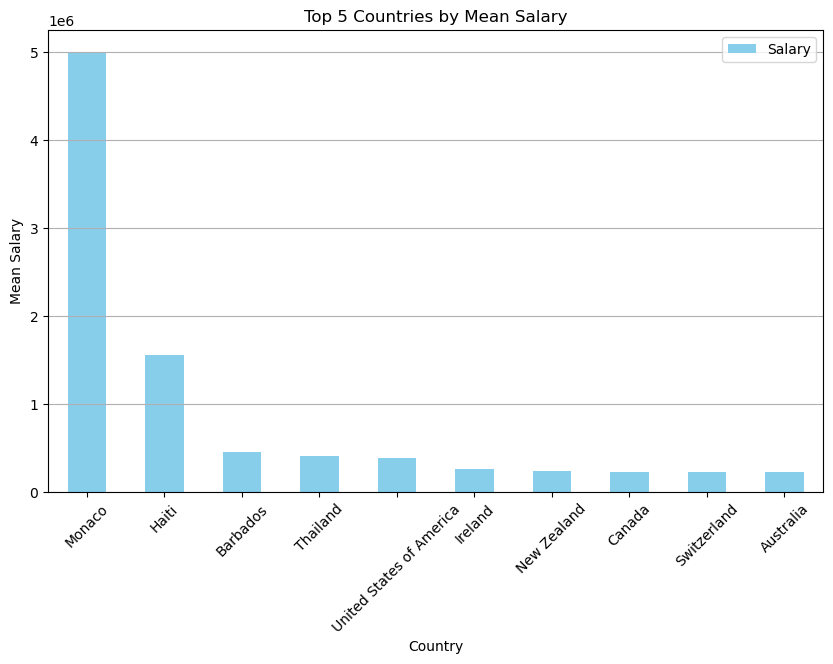

In [21]:

# Sort the DataFrame by mean salary in descending order and select the top 5 countries
top_5_countries = mean_salary_by_country.sort_values('Salary', ascending=False).head(10)

# Plotting the bar grap
top_5_countries.plot(x='Country', y='Salary', kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 5 Countries by Mean Salary')
plt.xlabel('Country')
plt.ylabel('Mean Salary')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [22]:
df['YearsCodePro'].unique()

array(['4', '3', '20', '7', '12', 'Less than 1 year', '2', '1', '5', '8',
       '6', '34', '10', '13', '17', '11', '16', '15', '9', '30', '19',
       '14', '23', '25', '28', '18', '21', '22', '24', '27', '29', '31',
       '26', '48', '37', '32', '35', '36'], dtype=object)

In [23]:
def clean_experiance(x):
    if x == 'Less than 1 year':
        return 0.5
    if x =='More than 50 years':
        return 50
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experiance)  

In [24]:
df['YearsCodePro'].unique()

array([ 4. ,  3. , 20. ,  7. , 12. ,  0.5,  2. ,  1. ,  5. ,  8. ,  6. ,
       34. , 10. , 13. , 17. , 11. , 16. , 15. ,  9. , 30. , 19. , 14. ,
       23. , 25. , 28. , 18. , 21. , 22. , 24. , 27. , 29. , 31. , 26. ,
       48. , 37. , 32. , 35. , 36. ])

In [25]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)', 'Something else',
       'Primary/elementary school',
       'Other doctoral degree (Ph.D., Ed.D., etc.)'], dtype=object)

In [26]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelors degree'
    if 'Master’s degree' in x:
        return 'Masters degree'
    if 'Professional degree' in x or 'Other doctoral degree' in x:
        return 'Post grad'
    else:
        return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [27]:
df['EdLevel'].unique()

array(['Bachelors degree', 'Masters degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 2, 1, 3])

In [29]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([ 8,  1, 14,  6,  5, 11,  4,  9,  3, 16, 10,  0, 13, 15,  7,  2, 12])

In [30]:
x = df.drop("Salary",axis=1)
y = df['Salary']

In [31]:
from sklearn.model_selection import train_test_split


In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
from sklearn.metrics import r2_score,accuracy_score


# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
y_pred = linear_reg.predict(X_test)  
r2_squared_reg = r2_score(y_test,y_pred) 
error_reg = mean_squared_error(y_test,y_pred)
error_reg = np.sqrt(error_reg)


In [35]:
print("Error for Reg. is ${:,.02f}".format(error_reg))
print("R2 for Reg.",r2_squared_reg)

Error for Reg. is $6,649.28
R2 for Reg. 0.04418986606626263


# Decision Tree


In [36]:
from sklearn.tree import DecisionTreeClassifier
linear_reg = DecisionTreeClassifier()
linear_reg.fit(X_train,y_train)
y_pred = linear_reg.predict(X_test)  
r2_squared_dt = r2_score(y_test,y_pred) 
error_dt = mean_squared_error(y_test,y_pred)
error_dt = np.sqrt(error_dt)

In [37]:
print("Error for D.t is ${:,.02f}".format(error_dt))
print("R2 for DT",r2_squared_dt)

Error for D.t is $8,426.09
R2 for DT -0.5348807758460188


# RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestClassifier
random_forest= RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)  
r2_squared_forest = r2_score(y_test,y_pred) 
error_Forest = mean_squared_error(y_test,y_pred)
error_Forest = np.sqrt(error_Forest)

In [39]:
print("Error for RandomForest is  ${:,.02f}".format(error_Forest))
print("R2 for Random Forest",r2_squared_forest)

Error for RandomForest is  $8,295.94
R2 for Random Forest -0.4878316319192346


In [40]:
from sklearn.model_selection import GridSearchCV

max_depth = [None,2,4,6,8,10,12]
parameters = {"max_depth":max_depth}
regressor = DecisionTreeClassifier(random_state=0)
ga = GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error')
ga.fit(X_train,y_train)


c:\Users\VYOM\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [41]:
regressor  = ga.best_estimator_
y_pred=regressor.predict(X_test)
error_grid = np.sqrt(mean_squared_error(y_pred,y_test))
print("Error for GridCV is  ${:,.02f}".format(error_grid))


Error for GridCV is  $8,133.88


In [42]:
print("Error for Reg. is ${:,.02f}".format(error_reg))
print("Error for GridCV is  ${:,.02f}".format(error_grid))
print("Error for RandomForest is  ${:,.02f}".format(error_Forest))
print("Error for D.t is ${:,.02f}".format(error_dt))




Error for Reg. is $6,649.28
Error for GridCV is  $8,133.88
Error for RandomForest is  $8,295.94
Error for D.t is $8,426.09


In [43]:
que = np.array([['India', 'Bachelors degree', 5]])
que[:, 0] = le_country.transform(que[:, 0])
que[:, 1] = le_education.transform(que[:, 1])
que = que.astype(float)

In [44]:
que

array([[5., 0., 5.]])

In [45]:
y_pred = linear_reg.predict(que)

c:\Users\VYOM\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [46]:
y_pred

array([19346.])

In [47]:
import pickle


In [48]:
data = {"model":linear_reg,"le_country":le_country,"le_education":le_education}
with open('final_saved_steps.pkl','wb') as file:
    pickle.dump(data,file)
    

In [49]:
with open('final_saved_steps.pkl','rb') as file:
    data = pickle.load(file)

regressor_loaded = data['model']
le_country = data['le_country']
le_education = data['le_education']

In [50]:

y_pred = regressor_loaded.predict(que)
y_pred

c:\Users\VYOM\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([19346.])